## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import robust_scale, StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

#### Loading the dataset

In [2]:
data=pd.read_csv("C:/Users\lenovo\OneDrive\Documents\project\minor project\Survey.csv")
data.head()

,Name,Destination,Traveller_Count,Stay_Duration,Food_Expense,Stay_Expense,LocalTransportation_Expense,Activities_Expense,Budget
0,Rishi Rana,Delhi,4,2,2200,1000,1500,300,2250
1,Rishi Rana,Kasauli,6,1,1000,0,1200,200,1400
2,Rishi Rana,Dharamshala,3,3,2000,3600,2000,1000,3867
3,Rishi Rana,Shimla,5,2,3000,2000,1300,700,2400
4,MD JUNEIDH HUSSAIN CHOUDHURY,Shimla,5,2,2000,1500,800,3000,2460


### EDA

In [3]:
data.shape

(56, 9)

In [4]:
#check for duplicated data
data.duplicated().sum()

0

In [5]:
#check for nulll values
data.isnull().sum()

Name                           0
Destination                    0
Traveller_Count                0
Stay_Duration                  0
Food_Expense                   0
Stay_Expense                   0
LocalTransportation_Expense    0
Activities_Expense             0
Budget                         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         56 non-null     object
 1   Destination                  56 non-null     object
 2   Traveller_Count              56 non-null     int64 
 3   Stay_Duration                56 non-null     int64 
 4   Food_Expense                 56 non-null     int64 
 5   Stay_Expense                 56 non-null     int64 
 6   LocalTransportation_Expense  56 non-null     int64 
 7   Activities_Expense           56 non-null     int64 
 8   Budget                       56 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 4.1+ KB


In [7]:
data.describe()

,Traveller_Count,Stay_Duration,Food_Expense,Stay_Expense,LocalTransportation_Expense,Activities_Expense,Budget
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,3.607143,5.964286,7325.892857,13562.500000,6122.696429,6266.964286,15632.428571
std,2.024204,13.067606,8969.650804,27933.528648,14220.848878,8487.553865,42390.612575
min,1.000000,1.000000,400.000000,0.000000,0.000000,0.000000,1325.000000
25%,2.000000,2.000000,2725.000000,2875.000000,1500.000000,1000.000000,4187.500000
50%,3.000000,4.000000,5000.000000,7750.000000,3000.000000,4250.000000,7800.000000
75%,5.000000,6.000000,7000.000000,14250.000000,5000.000000,7000.000000,14312.750000
max,10.000000,100.000000,50000.000000,200000.000000,100000.000000,40000.000000,321000.000000


In [8]:
data.drop(columns=['Name'], inplace=True)

<Axes: xlabel='Destination'>

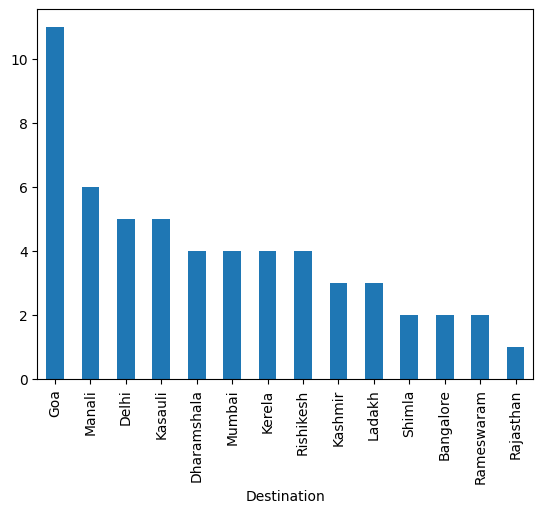

In [9]:
data.Destination.value_counts().plot(kind='bar')

Goa stands out as the top choice for Indian travelers, attracting the highest number of visitors.

Manali and Delhi are also significant destinations, ranking second and third, respectively.

Smaller towns like Kasauli, Dharamshala, and Shimla are gaining popularity among travelers.

Beach destinations like Goa and Rameswaram are popular choices for leisure travel.

Hill station destinations like Manali, Kasauli, Dharamshala, and Shimla appeal to travelers seeking a change of climate and scenic beauty.

Culturally rich destinations like Kerala and Rajasthan have a loyal following among travelers.

Overall, the bar chart highlights the diversity of tourist destinations in India, catering to various travel preferences.

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


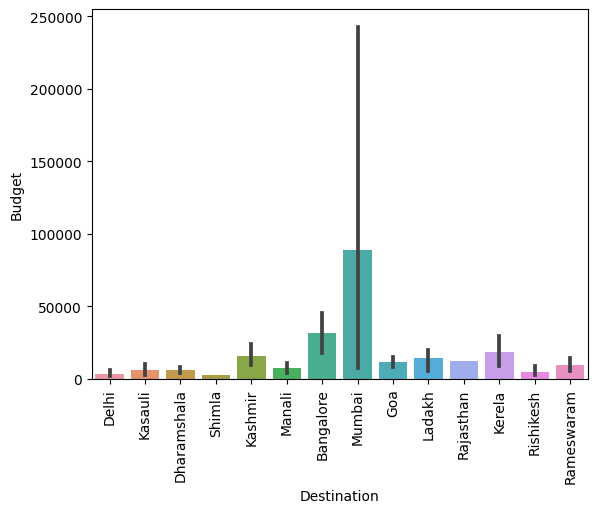

In [10]:
sns.barplot(x=data.Destination, y=data.Budget)
plt.xticks(rotation='vertical')
plt.show()

1. Goa emerges as the priciest destination for travelers, due to its popularity among foreigners, luxurious resorts, and activities like water sports and nightlife.

2. Ladakh, known for its remoteness, high altitudes, and unique cultural experiences, also commands a higher price tag.

3. Shimla, Manali, and Delhi, though culturally rich and offering diverse attractions, are also more expensive due to their infrastructure and amenities.

4. Beach destinations like Goa and Rameswaram are generally more expensive than hill station destinations like Kasauli, Dharamshala, and Rajasthan.

5. Culturally rich destinations like Kerala and Rajasthan offer a mix of experiences, catering to different budgets.

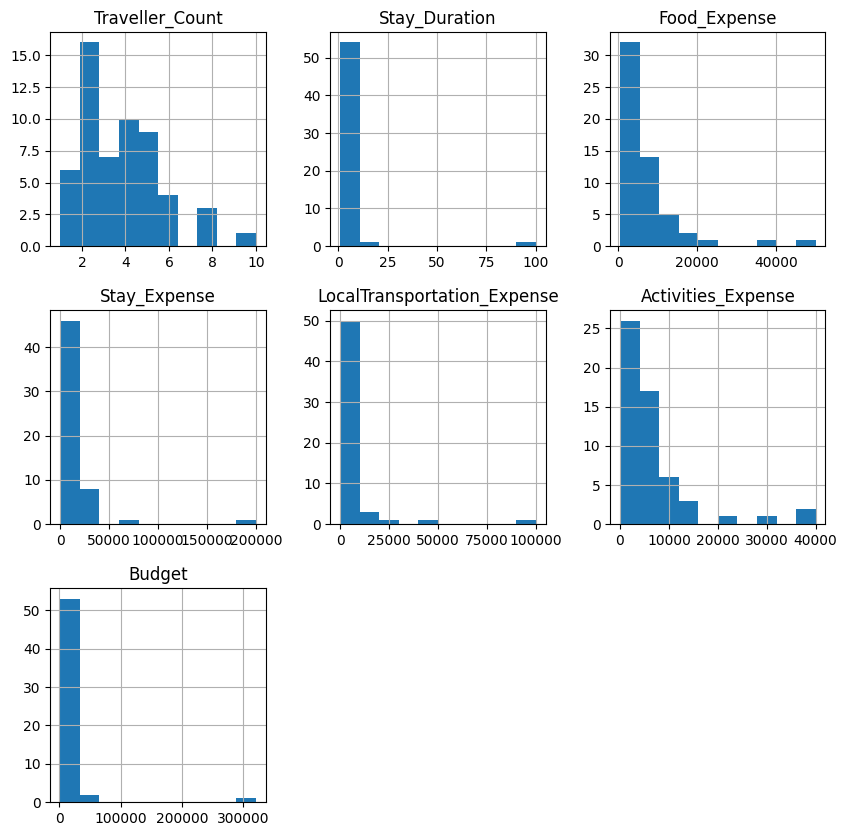

In [11]:
data.hist(figsize=(10, 10))
plt.show()

From the histograms, we can analyze the following:

Traveler Count:
Most trips involve 2-4 travelers, with a peak around 2 travelers.
Trips with 5 or 6 travelers are less frequent.
There are few trips with more than 6 travelers.

Stay Duration:
The most common trip duration is 2-4 days.
Trips with 5-7 days are also relatively frequent.
There are less frequent trips with 1 day or more than 7 days.

Food Expense:
Food expenses follow a right-skewed distribution, with most trips having expenses below 20000.
There are some trips with relatively high food expenses exceeding 40000. This might warrant further investigation.

Stay Expense:
Stay expenses also show a right-skewed distribution, with most trips costing between 50000 and 100000.
However, there are outliers with extremely high stay expenses exceeding 200000. It might be helpful to investigate these cases further.

Local Transportation Expense:
Local transport costs are mostly concentrated below 25000.
There are some outliers with higher transportation expenses suggesting more reliance on local transport or a longer travel distance within the destination.

Activities Expense:
Activities expense exhibit a bimodal distribution, with peaks around 10000 and 30000. This suggests two potential groups with different spending patterns for activities

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

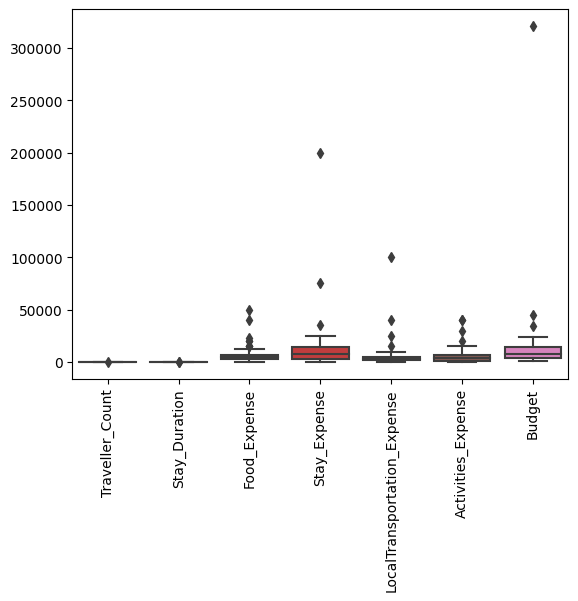

In [12]:
sns.boxplot(data=data)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

Traveller_Count: The median traveler count is 4, with an interquartile range (IQR) of 2. This means that the middle 50% of travelers have a count of 2-4. There are a few outliers with traveler counts of 5 or more.

Stay_Duration: The median stay duration is 3 days, with an IQR of 2. This means that the middle 50% of travelers stay for 2-3 days. There are a few outliers with stay durations of more than 5 days.

Food_Expense: The median food expense is INR 15,000, with an IQR of INR 10,000. This means that the middle 50% of travelers spend between INR 5,000 and INR 15,000 on food. There are a few outliers who spent more than INR 30,000 on food.

Stay_Expense: The median stay expense is INR 15,000, with an IQR of INR 10,000. This means that the middle 50% of travelers spend between INR 5,000 and INR 15,000 on stay. There are a few outliers who spent more than INR 30,000 on stay.

LocalTransportation_Expense: The median local transportation expense is INR 7,500, with an IQR of INR 5,000. This means that the middle 50% of travelers spend between INR 2,500 and INR 7,500 on local transportation. There are a few outliers who spent more than INR 15,000 on local transportation.

Activities_Expense: The median activities expense is INR 15,000, with an IQR of INR 10,000. This means that the middle 50% of travelers spend between INR 5,000 and INR 15,000 on activities. There are a few outliers who spent more than INR 30,000 on activities.

Budget: The median budget is INR 75,000, with an IQR of INR 50,000. This means that the middle 50% of travelers have a budget between INR 25,000 and INR 75,000. There are a few outliers with budgets of more than INR 150,000.

In [13]:
sns.heatmap(data.corr(), annot=True, cmap='tab20')
plt.show()

ValueError: could not convert string to float: 'Delhi'

Traveller_Count has a positive correlation with Food_Expense, Stay_Expense, and Activities_Expense. 
This means that travelers who are traveling with more people tend to spend more on food, stay, and activities.

Stay_Duration has a positive correlation with Food_Expense, Stay_Expense, and Activities_Expense. 
This means that travelers who are staying for longer tend to spend more on food, stay, and activities.

Food_Expense has a positive correlation with Stay_Expense and Activities_Expense. 
This means that travelers who spend more on food tend to also spend more on stay and activities.

LocalTransportation_Expense has a positive correlation with Activities_Expense. 
This means that travelers who spend more on local transportation tend to also spend more on activities.

##### handling outliers

In [14]:
from scipy.stats import zscore
z_scores = zscore(data['Stay_Duration'])
outliers = (z_scores > 3) | (z_scores < -3)
np.where(outliers)[0]

array([49], dtype=int64)

So, we see that the rowindex '49' is an outlier as it's out of the interquartile range indicating that it deviates significantly from the mean of the 'Stay_Duration' column.

In [15]:
data.iloc[49]

Destination                    Mumbai
Traveller_Count                     1
Stay_Duration                     100
Food_Expense                    50000
Stay_Expense                   200000
LocalTransportation_Expense     40000
Activities_Expense              30000
Budget                         321000
Name: 49, dtype: object

In [16]:
data.drop(index=49,inplace=True)

### Checking if data is normalized.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14548\3986651888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Food_Expense)
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

<Axes: xlabel='Food_Expense', ylabel='Density'>

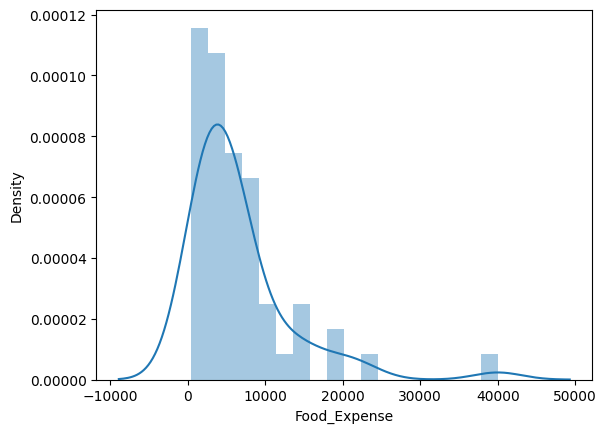

In [17]:
sns.distplot(data.Food_Expense)

It is right skewed.

In [18]:
#Applying log transformations to normalize the data
#data.Food_Expense=np.log1p(data.Food_Expense)
#sns.distplot(data.Food_Expense)

It is now Normalized.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14548\1213087312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Stay_Expense)
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

<Axes: xlabel='Stay_Expense', ylabel='Density'>

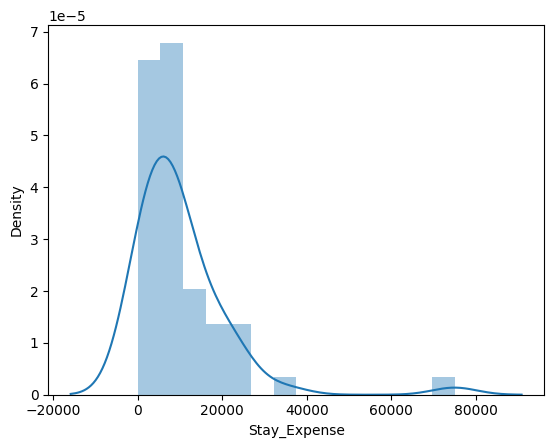

In [19]:
sns.distplot(data.Stay_Expense)

It is also right skewed.

In [20]:
X=data.iloc[:,:3]
y=data.Budget
X.head()

,Destination,Traveller_Count,Stay_Duration
0,Delhi,4,2
1,Kasauli,6,1
2,Dharamshala,3,3
3,Shimla,5,2
4,Shimla,5,2


In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [22]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'),['Destination']),],
                        remainder='passthrough')

step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6783976272912854
MAE 4597.917969471547


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [23]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6703793039071051
MAE 4892.445485374592


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [39]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=Lasso(alpha=0.04)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6782969926306751
MAE 4597.544067340484


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [25]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.40885312878075075
MAE 5004.686274509804


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [26]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=7)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.2439139365362325
MAE 6855.082352941176


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [27]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=SVR(kernel='rbf', C=200,epsilon=0.7)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score -0.054478502034102094
MAE 7486.380477512534


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [28]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100,random_state=101,max_depth=15,max_features=0.25,max_samples=0.6)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.47482753948824097
MAE 5316.301176470588


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [29]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=ExtraTreesRegressor(bootstrap=True,n_estimators=100,random_state=101,max_depth=15,max_features=0.75,max_samples=0.6)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

R2 score 0.40072171852624583
MAE 5541.43


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [30]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=AdaBoostRegressor(n_estimators=10,learning_rate=2.5)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.4122204468892685
MAE 5401.666666666667


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [31]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=85)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.4768797524522853
MAE 5277.762475072607


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [32]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
step2=XGBRegressor(n_estimators=10,max_depth=25, learning_rate=1.0)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.32372514445890055
MAE 6599.998664407169


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

In [33]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
xgb=XGBRegressor(n_estimators=10,max_depth=25, learning_rate=1.0)
gbr=GradientBoostingRegressor(n_estimators=85)
abr=AdaBoostRegressor(n_estimators=10,learning_rate=2.5)
etr=ExtraTreesRegressor(bootstrap=True,n_estimators=100,random_state=101,max_depth=15,max_features=0.75,max_samples=0.6)
rfr=RandomForestRegressor(n_estimators=100,random_state=101,max_depth=15,max_features=0.25,max_samples=0.6)
svr=SVR(kernel='rbf', C=200,epsilon=0.7)
dtr=DecisionTreeRegressor(max_depth=7)
knn=KNeighborsRegressor(n_neighbors=3)
lsr=Lasso(alpha=0.04)
lrr=Ridge(alpha=10)
lr=LinearRegression()

step2=VotingRegressor([('xgb',xgb),('gbr',gbr),('abr',abr),('etr',etr),
                       ('rfr',rfr),('svr',svr),('dtr',dtr),('knn',knn),
                      ('lsr',lsr),('lrr',lr),('lr',lr)],weights=[1,1,1,1,1,1,1,1,4,1,5])
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

R2 score 0.6030869812723811
MAE 4861.980498841357


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [34]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
estimators=[
    ('xgb',XGBRegressor(n_estimators=10,max_depth=25, learning_rate=1.0)),
    ('etr',ExtraTreesRegressor(bootstrap=True,n_estimators=100,random_state=101,max_depth=15,max_features=0.75,max_samples=0.6)),
    ('rfr',RandomForestRegressor(n_estimators=100,random_state=101,max_depth=15,max_features=0.25,max_samples=0.6)),
    ('lsr',Lasso(alpha=0.04)),
    ('lrr',Ridge(alpha=10)),
    ('lr',LinearRegression())
]
step2=StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=17))
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

R2 score 0.594551039870733
MAE 5084.011380444107


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.391e+07, tolerance: 1.295e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\P

In [35]:
step1=ColumnTransformer(transformers=
                        [('Des', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'), ['Destination'])],
                        remainder='passthrough')
xgb=XGBRegressor(n_estimators=10,max_depth=25, learning_rate=1.0)
etr=ExtraTreesRegressor(bootstrap=True,n_estimators=100,random_state=101,max_depth=15,max_features=0.75,max_samples=0.6)
rfr=RandomForestRegressor(n_estimators=100,random_state=101,max_depth=15,max_features=0.25,max_samples=0.6)
lsr=Lasso(alpha=0.04)
lrr=Ridge(alpha=10)
lr=LinearRegression()

step2=VotingRegressor([('xgb',xgb),('etr',etr),('rfr',rfr),('lsr',lsr),('lrr',lr),('lr',lr)],weights=[1,1,1,4,2,5])
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_s

R2 score 0.6543173349950682
MAE 4596.201382399467


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fut

## Exporting the model

In [40]:
import pickle
pickle.dump(data,open('travel_data.pkl','wb'))
pickle.dump(pipe,open('pipeline.pkl','wb'))